# Homework 2: Trees and Calibration


## Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

**Make sure to use the dataset that we provide in CourseWorks/Classroom.**

**There are a lot of applied questions based on the code results. Please make sure to answer them all. These are primarily to test your understanding of the results your code generate (similar to any Data Science/ML case study interviews).**



```
# This is formatted as code
```

## Name: Liang Hu

## UNI: lh3057

## The Dataset


### Description

This data set contains details of ecommerce product shipment tracking and the target variable is a binary variable reflecting the fact whether the product reached on time or not.

In [34]:
import numpy as np

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

## Question 1: Decision Trees

**1.1: Load the provided dataset**

In [36]:
df = pd.read_csv("data.csv")

**1.2: Are there any missing values in the dataset?**

In [37]:
missing_values = df.isnull().sum()

print(missing_values)

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached_On_Time        0
dtype: int64


In [38]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_On_Time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


**1.3: Plot side-by-side bars of class distribtuion for each category for the categorical feature and the target categories.**


In [39]:
import matplotlib.ticker as mtick

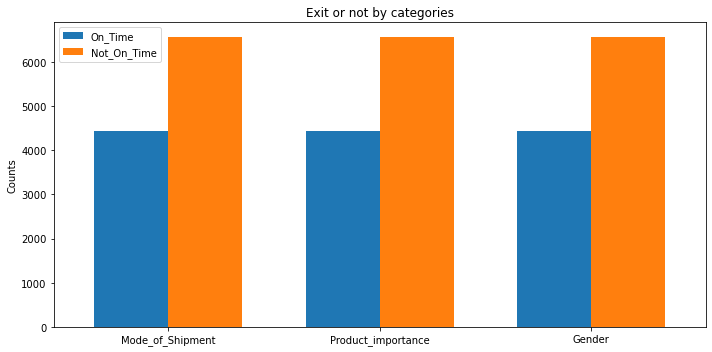

In [40]:
categorical = ['Mode_of_Shipment','Product_importance', 'Gender']
target = df[['Mode_of_Shipment','Product_importance', 'Gender','Reached_On_Time']].groupby('Reached_On_Time').count()
fig, ax = plt.subplots(figsize=(10,5))
labels = target.columns.tolist()
ind = np.arange(len(target.columns))  # the x locations for the groups
width = 0.35       # the width of the bars
On_Time = ax.bar(ind-width/2, np.array(target[0:1]).reshape(3,),width, label='On_Time')
Not_On_Time = ax.bar(ind+width/2, np.array(target[1:2]).reshape(3,), width, label='Not_On_Time')

ax.set_ylabel('Counts')
ax.set_title('Exit or not by categories')
ax.legend()
ax.bar(labels, ind)
fig.tight_layout()
plt.show()

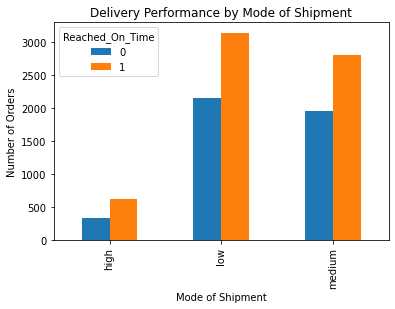

In [41]:
# Group the combined data by the mode of shipment and the Reached_On_Time_Status
grouped_data = df.groupby(['Product_importance', 'Reached_On_Time']).size().unstack()

# Create a bar plot of the grouped data
grouped_data.plot(kind='bar')

# Set the labels for the plot
plt.xlabel('Mode of Shipment')
plt.ylabel('Number of Orders')
plt.title('Delivery Performance by Mode of Shipment')

# Display the plot
plt.show()

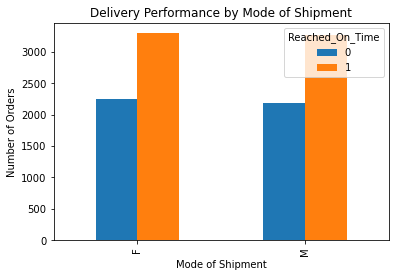

In [42]:
# Group the combined data by the mode of shipment and the Reached_On_Time_Status
grouped_data = df.groupby(['Gender', 'Reached_On_Time']).size().unstack()

# Create a bar plot of the grouped data
grouped_data.plot(kind='bar')

# Set the labels for the plot
plt.xlabel('Mode of Shipment')
plt.ylabel('Number of Orders')
plt.title('Delivery Performance by Mode of Shipment')

# Display the plot
plt.show()





**1.4: Explain the distribution of the target variable and the dataset.**


The distribution is imbalance. 

**1.5: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

**Hint: Based on the distribution of the data, try to use the best splitting strategy.**

In [129]:
## YOUR CODE HERE
from sklearn.model_selection import train_test_split
X = df.drop(columns=['ID','Warehouse_block','Customer_care_calls','Customer_rating','Reached_On_Time'])
y = df['Reached_On_Time']
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
X_train, X_val,y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.33, random_state=42, stratify= y_dev)

In [ ]:

X_dev.drop(columns = ["Mode_of_Shipment","Gender","Product_importance"],axis=1,inplace = True)

**1.6: Would you drop any column? Justify your reasoning.** 

**Preprocess the data (Handle the Categorical Variable). Do we need to apply scaling? Briefly Justify**



I will drop 'ID','Warehouse_block','Customer_care_calls','Customer_rating','Reached_On_Time'

In [68]:
## YOUR CODE HERE

In [69]:
X_train

,Mode_of_Shipment,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
5472,Road,241,3,low,M,4,4493
6063,Ship,231,2,medium,M,3,4696
8736,Ship,229,2,low,F,9,5672
2286,Ship,234,2,high,F,61,3084
5035,Ship,134,3,low,F,1,1008
...,...,...,...,...,...,...,...
3842,Flight,172,2,low,M,5,4554
7046,Ship,175,3,low,M,8,4274
3048,Ship,141,4,medium,F,38,1599
7028,Ship,196,4,low,F,4,5031


**1.7: Fit a Decision Tree on the development data until all leaves are pure. What is the performance of the tree on the development set and test set? Evaluate test and train accuarcy on F-1 score and accuracy.**

In [130]:
X_train = X_train.copy()

In [131]:
from sklearn.preprocessing import OneHotEncoder    
ohe_geo = OneHotEncoder()
ohe_gen = OneHotEncoder()

geo_transformed_train = ohe_geo.fit_transform(X_train[["Mode_of_Shipment"]])
X_train[ ['Flight', 'Ship' ,'Road']] = geo_transformed_train.toarray()

gen_transformed_train = ohe_gen.fit_transform(X_train[["Gender"]])
X_train[["F","M"]] = gen_transformed_train.toarray()

geo_transformed_train = ohe_geo.fit_transform(X_train[["Product_importance"]])
X_train[ ['high', 'low' ,'medium']] = geo_transformed_train.toarray()

X_train.drop(columns = ["Mode_of_Shipment","Gender","Product_importance"],axis=1,inplace = True)

In [132]:
X_val = X_val.copy()

In [133]:


geo_transformed_val = ohe_geo.fit_transform(X_val[["Mode_of_Shipment"]])
X_val[['Flight', 'Ship' ,'Road']] = geo_transformed_val.toarray()

gen_transformed_val = ohe_gen.fit_transform(X_val[["Gender"]])
X_val[["F","M"]] = gen_transformed_val.toarray()

gen_transformed_val = ohe_gen.fit_transform(X_val[["Product_importance"]])
X_val[ ['high', 'low' ,'medium']] = gen_transformed_val.toarray()


X_val.drop(columns = ["Mode_of_Shipment","Gender","Product_importance"],axis=1,inplace = True)

In [143]:
X_val

,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Flight,Ship,Road,F,M,high,low,medium
2802,99,3,63,1223,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
6072,259,3,3,4509,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1702,188,3,50,3992,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
10718,246,5,4,1072,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
651,231,4,48,3370,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8492,150,3,5,4512,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3258,246,3,10,4078,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
197,136,3,19,1568,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
8216,143,5,9,4060,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [134]:
X_test = X_test.copy()

In [135]:
geo_transformed_test = ohe_geo.fit_transform(X_test[["Mode_of_Shipment"]])
X_test[['Flight', 'Ship', 'Road']] = geo_transformed_test.toarray()

gen_transformed_test = ohe_gen.fit_transform(X_test[["Gender"]])
X_test[["F","M"]] = gen_transformed_test.toarray()

gen_transformed_test  = ohe_gen.fit_transform(X_test[["Product_importance"]])
X_test[ ['high', 'low' ,'medium']] = gen_transformed_test.toarray()
X_test.drop(columns = ["Mode_of_Shipment","Gender","Product_importance"],axis=1,inplace = True)

print("We do not fneed to apply scaling because the decision tree will split the data in to different sections \
with a certain line. Even after scaling, the separted porportion is still the same, so there is no need to scale.")

We do not fneed to apply scaling because the decision tree will split the data in to different sections with a certain line. Even after scaling, the separted porportion is still the same, so there is no need to scale.


In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_val_pred = dtc.predict(X_val)
y_test_pred = dtc.predict(X_test)
print(f"\
the accuracy score is {accuracy_score(y_val,y_val_pred)}, \
the F1-Score is {f1_score(y_val, y_val_pred,pos_label=1)}.")
print(f"\
the accuracy score is {accuracy_score(y_test,y_test_pred)}, \
the F1-Score is {f1_score(bank_y_test,bank_y_test_pred,pos_label=1)}.")
print("Precision, Recall, and F1 are metrics relevant to the decision tree bceause they are better for imbalance datasets.")

the accuracy score is 0.6710526315789473, the F1-Score is 0.7194950911640954.
the accuracy score is 0.6421487603305785, the F1-Score is 0.6905598500819864.
Precision, Recall, and F1 are metrics relevant to the decision tree bceause they are better for imbalance datasets.


**1.8: Visualize the trained tree until the max_depth 8.**

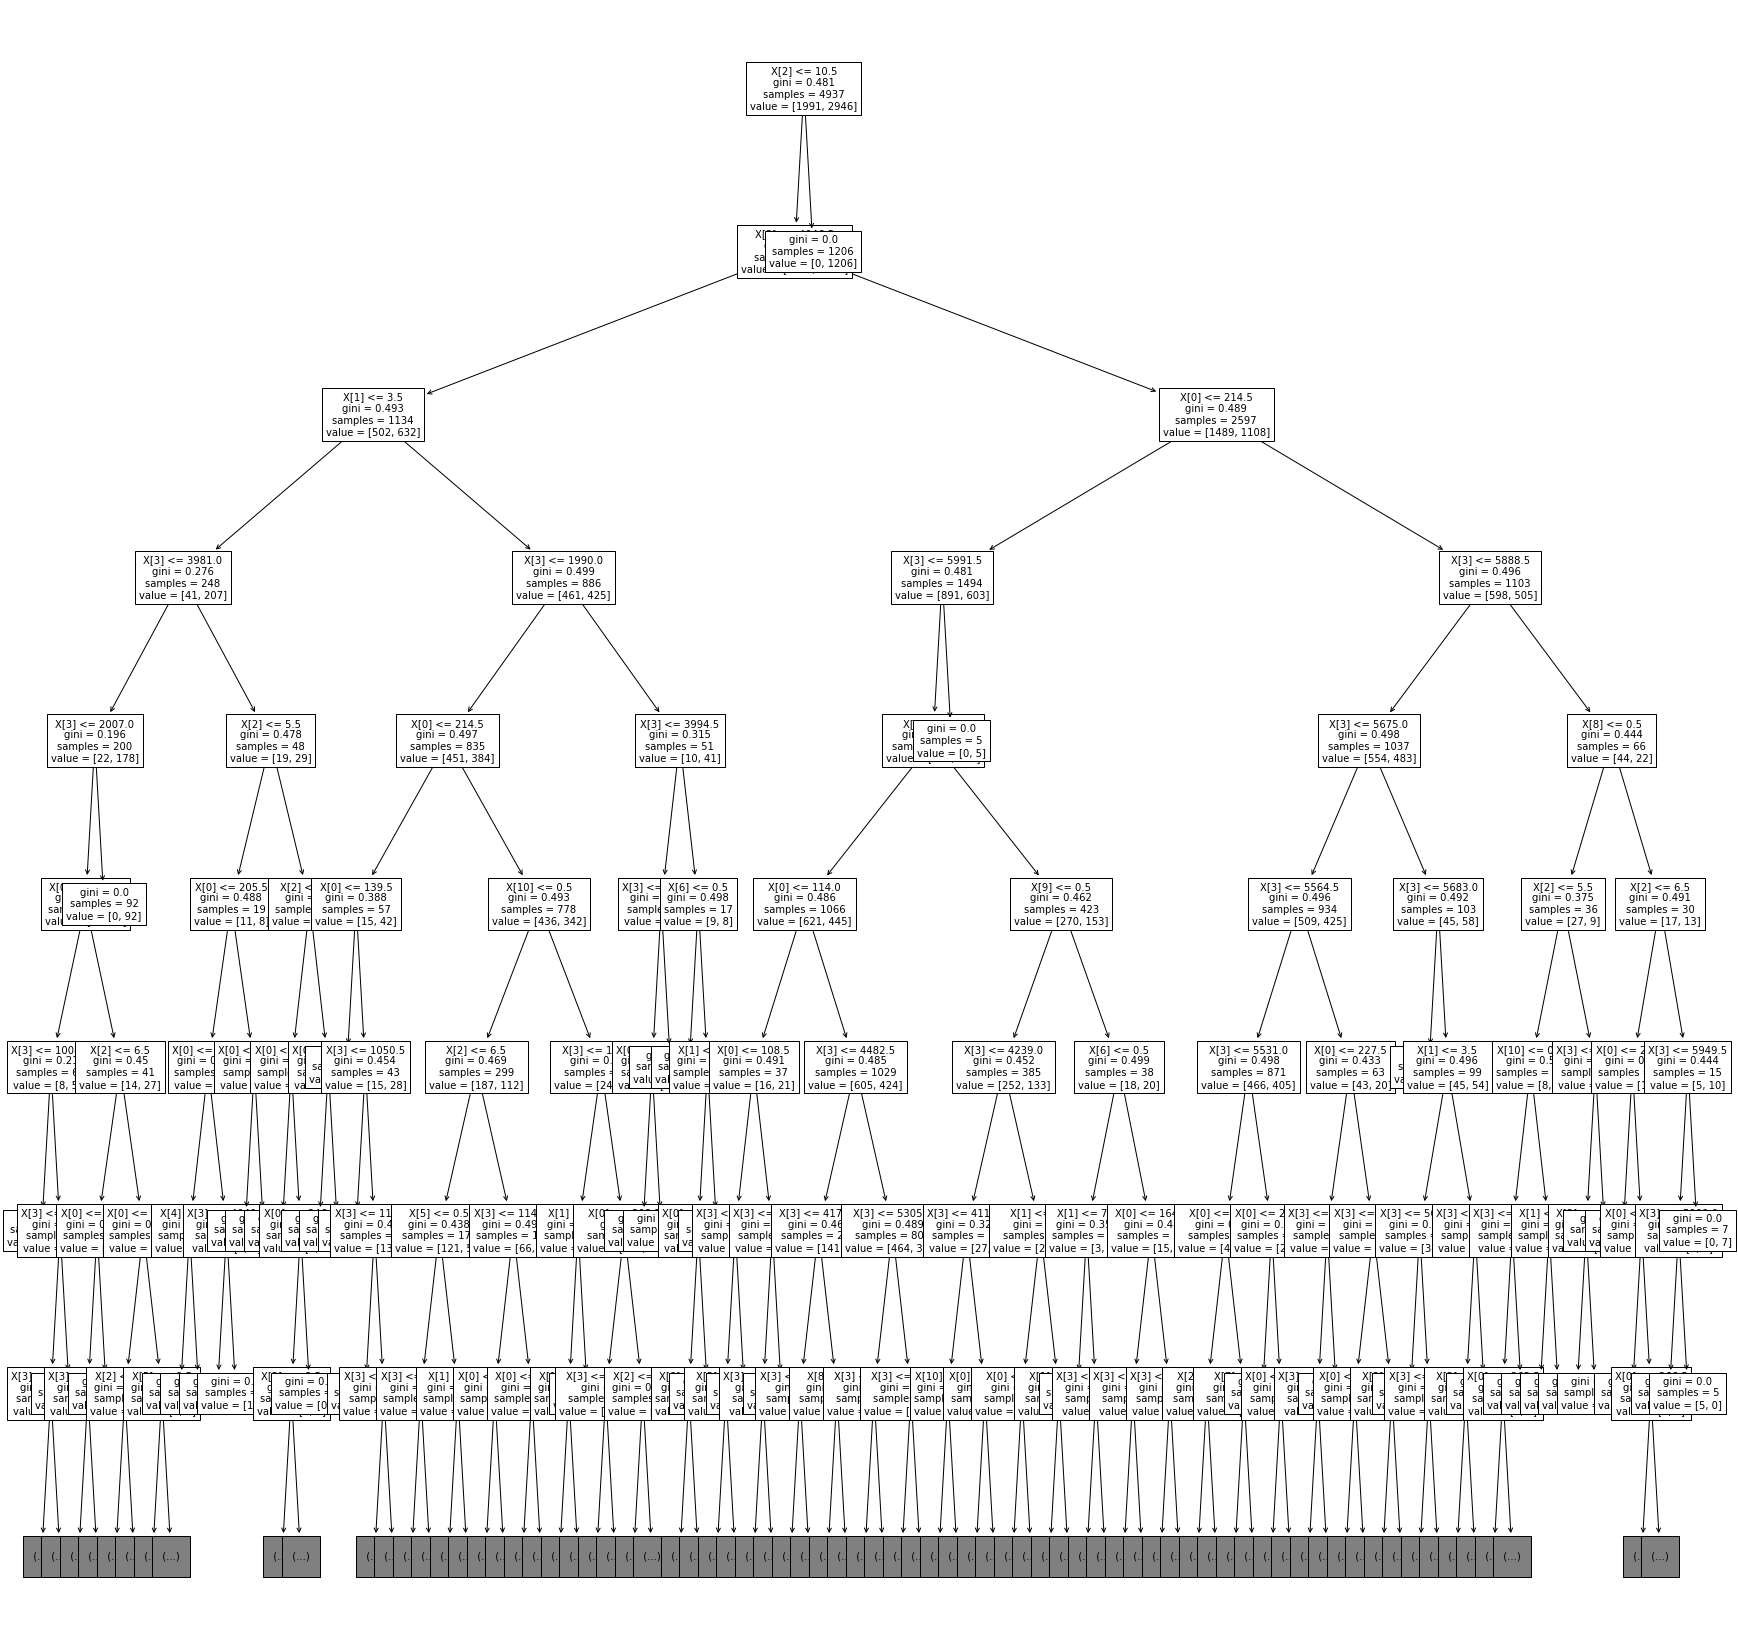

In [61]:
## YOUR CODE HERE
from sklearn import tree
plt.figure(figsize=(30,30))
tree.plot_tree(dtc,max_depth=8, fontsize=10)
plt.savefig('tree_high_dpi', dpi=144)

**1.9: Prune the tree using one of the techniques discussed in class and evaluate the performance.**

**Print the optimal value of the tuned parameter.**

In [65]:
cc = dtc.cost_complexity_pruning_path(X_train,y_train)
alphas = cc.ccp_alphas
impurities = cc.impurities
max_a = alphas[0]
accuracy = -1
for a in alphas:
    dt = DecisionTreeClassifier(random_state=0,ccp_alpha = a)
    dt.fit(bank_X_train,bank_y_train)
    score = precision_score(bank_y_val,dt.predict(X_val))
    if accuracy < score:
        accuracy = score
        max_a = a
dt_best = DecisionTreeClassifier(ccp_alpha = max_a)
dt_best.fit(X_train,y_train)
print(f"The optimal value of the tuned parameter is {max_a}.")

The optimal value of the tuned parameter is 0.007675991720991121.


**1.10: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

/Users/larry_1/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


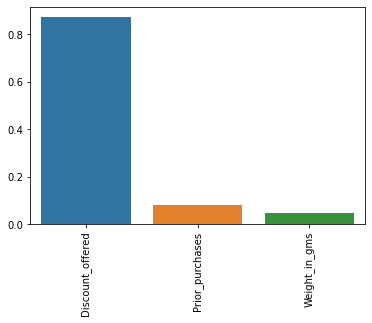

The top 3 most important features are Age, NumofProducts, IsActivemembet.


In [66]:
## YOUR CODE HERE
feat_imps = list(zip(X_train.columns,dt_best.feature_importances_))
feats,imps = zip(*(sorted(list(filter(lambda x:x[1]!=0,feat_imps)),key=lambda x:x[1], reverse = True)))
ax = sns.barplot(list(feats),list(imps))
ax.tick_params(axis='x',rotation=90)
plt.show()
print("The top 3 most important features are Disounted_offered, Prior_purchases, and weight.")

## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Use accuracy and F1 score to evaluate. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.7)?**

In [113]:
## YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)
print(f"\
the accuracy score is {accuracy_score(y_test,rfc.predict(X_test))}, \
the F1-Score is {f1_score(y_test, rfc.predict(X_test),pos_label=1)}.")

print(f"\
the accuracy score is {accuracy_score(y_test,y_test_pred)}, \
the F1-Score is {f1_score(bank_y_test,bank_y_test_pred,pos_label=1)}.")

the accuracy score is 0.6504132231404959, the F1-Score is 0.6905632772494514.
the accuracy score is 0.6363636363636364, the F1-Score is 0.6905598500819864.


**2.2: Do all trees in the trained random forest model have pure leaves? How would you verify that all trees have pure leaves? Print the score (mean accuracy) values of your choosen method**

In [83]:
# assume you have a trained random forest model 'rf'

# loop through each tree in the forest
for i, tree in enumerate(rfc.estimators_):
    # check if the tree has pure leaves
    leaf_purities = tree.tree_.impurity[tree.tree_.children_left == -1]
    if not all(purity == 0 for purity in leaf_purities):
        print(f"Tree {i} has impure leaves")

if all(all(purity == 0 for purity in tree.tree_.impurity[tree.tree_.children_left == -1]) for tree in rfc.estimators_):
    print("All trees in the random forest have pure leaves")


All trees in the random forest have pure leaves


Obtain the trained random forest model.
Loop through each tree in the random forest.
Check if the tree has pure leaves by verifying if the Gini index (or another impurity measure) of each leaf node is equal to 0. If the Gini index of a leaf node is 0, then it means that all samples in that node belong to the same class, which implies that the leaf is pure.
If all trees in the forest have pure leaves, then the random forest model has pure leaves as well.

**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


In [ ]:
## YOUR SOLUTION HERE

**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

In [84]:
## YOUR ANSWER HERE
print(f"For n_estimators, I will choose 200, 300, 400, 500, and 600. For max_depth, I choose 10, 15, 20, 25, and 30. \
As the value of n_estimators increases and the other remains the same, the performance should be better. \
The default n_estimator is 100. I would like to increase the number.\
The default of max_depth is None, which sets no limits on the tree. The depth of the decision tree \
is {dtc.tree_.max_depth} in 1.6. I believe the range of depth should be around or lower than this number.")

For n_estimators, I will choose 200, 300, 400, 500, and 600. For max_depth, I choose 10, 15, 20, 25, and 30. As the value of n_estimators increases and the other remains the same, the performance should be better. The default n_estimator is 100. I would like to increase the number.The default of max_depth is None, which sets no limits on the tree. The depth of the decision tree is 35 in 1.6. I believe the range of depth should be around or lower than this number.


**2.5: Perform model selection using the chosen values for the hyperparameters. Use out-of-bag (OOB) error for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on train and test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [117]:
## YOUR CODE HERE
from sklearn.model_selection import cross_val_score
ns = [200,300,400,500,600]
depths = [10,15,20,25,30]
scores = []
for i in range(5):
    rfc_choose = RandomForestClassifier(n_estimators=ns[i], oob_score=True,  max_depth = depths[i])
    rfc_choose.fit(X_train,y_train)
    oob_error = rfc_choose.oob_score_
    scores.append(oob_error)
best_n = ns[np.argmin(scores)]
best_depth = depths[np.argmin(scores)]
best_rfc = RandomForestClassifier(n_estimators=best_n, max_depth = best_depth)
best_rfc.fit(X_train,bank_y_train)
print(f"The score of best performace is {np.min(scores)} \
with n_estimators= {best_n} and max_depth = {best_depth}. The performance is better than in Q2.1")

The score of best performace is 0.6621430018229694 with n_estimators= 600 and max_depth = 30. The performance is better than in Q2.1


 **2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.10? If they differ, which feature set makes more sense?**

/Users/larry_1/opt/anaconda3/envs/myenv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


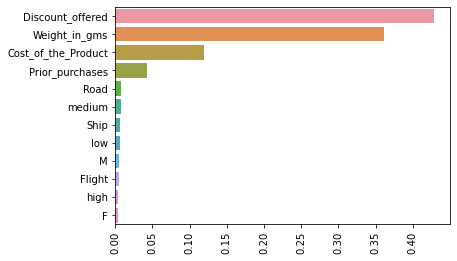

Age, NumofProducts, and Balance are the top 3 most important features. The difference compare to Q2.5 is that isActivement is replaced by Balance. I think Balance makes more sense because the performance of model in Q2.5 is higher than in Q1.9.


In [118]:
## YOUR CODE HERE
best_rfc = RandomForestClassifier(n_estimators=best_n_estimators,max_depth = 8)
best_rfc.fit(X_train,y_train)
feature_impors = list(zip(X_train.columns,best_rfc.feature_importances_))
feats, imps = zip(*(sorted(list(filter(lambda x:x[1]!=0,feature_impors)),key=lambda x:x[1], reverse = True)))
ax = sns.barplot(list(imps),list(feats))
ax.tick_params(axis='x',rotation=90)
plt.show()
print("Age, NumofProducts, and Balance are the top 3 most important features. The difference compare to Q2.5 is that \
isActivement is replaced by Balance. I think Balance makes more sense because the performance of model in Q2.5 is \
higher than in Q1.9.")

## Question 3: Gradient Boosted Trees

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_leaf_nodes': [31, 63, 127],
    'min_samples_leaf': [1, 2, 4]
}

model = HistGradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(model, param_grid=params, cv=5)

grid_search.fit(X_dev, y_dev)


In [ ]:
from sklearn.preprocessing import OneHotEncoder    
ohe_geo = OneHotEncoder()
ohe_gen = OneHotEncoder()

geo_transformed_train = ohe_geo.fit_transform(X_train[["Mode_of_Shipment"]])
X_train[ ['Flight', 'Ship' ,'Road']] = geo_transformed_train.toarray()

gen_transformed_train = ohe_gen.fit_transform(X_train[["Gender"]])
X_train[["F","M"]] = gen_transformed_train.toarray()

geo_transformed_train = ohe_geo.fit_transform(X_train[["Product_importance"]])
X_train[ ['high', 'low' ,'medium']] = geo_transformed_train.toarray()

X_train.drop(columns = ["Mode_of_Shipment","Gender","Product_importance"],axis=1,inplace = True)

**3.1: Choose three hyperparameters to tune HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. For each hyperparmeter, give it 3 potential values. Report on the time taken to do model selection for the model. Also, report the performance of the test dataset from the optimal models.**

In [142]:
X_dev

,Mode_of_Shipment,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
2683,Ship,160,3,low,M,57,1833
8948,Ship,161,4,low,F,9,4713
836,Flight,229,2,low,M,51,2628
76,Ship,158,2,medium,F,36,1788
10818,Flight,135,4,low,F,5,5934
...,...,...,...,...,...,...,...
1501,Road,269,2,medium,M,38,2195
3708,Flight,140,4,low,M,6,5067
3515,Ship,178,2,low,F,4,5307
6201,Ship,251,2,medium,F,6,4376


In [173]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score


# Define the hyperparameters to tune
learning_rates = [0.1, 0.01, 0.001]
max_leaf_nodes = [31, 63, 127]
min_samples_leaf = [1, 2, 4]

# Loop over all combinations of hyperparameters and evaluate their performance using cross-validation
hgbc_scores= []
hgbc_best_score = 0
hgbc_start = datetime.timestamp(datetime.now())
for i in range(3):
            model= HistGradientBoostingClassifier(learning_rate =learning_rates[i], max_leaf_nodes = max_leaf_nodes[i],min_samples_leaf = min_samples_leaf[i])
            model.fit(X_train,y_train)
            hgbc_score = cross_val_score(model,X_train, y_train, cv=5)
            hgbc_scores.append(np.mean(hgbc_score))              
hgbc_end = datetime.timestamp(datetime.now())
hgbc_best_score = np.max(hgbc_scores)
hgbc_time = datetime.fromtimestamp(hgbc_end)-datetime.fromtimestamp(hgbc_start)
print(f"The performance of hist gradient boosting is {hgbc_best_score} spending {hgbc_time.total_seconds()} seconds")



The performance of hist gradient boosting is 0.665788653302651 spending 14.6745 seconds


**3.2: Repeat 3.1 for XGBoost.**

**Note**: For XGBoost, you **DO NOT NEED** to choose the same hyperparameters as HistGradientBoostingClassifier.

In [174]:
## YOUR CODE HERE
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
learning_rates = [0.1, 0.01, 0.001]
max_leaf_nodes = [31, 63, 127]
min_samples_leaf = [1, 2, 4]
xgb_scores = []
xgb_start = datetime.timestamp(datetime.now())

for i in range(3):
    xgb = XGBClassifier(learning_rate =learning_rates[i], max_leaf_nodes = max_leaf_nodes[i],min_samples_leaf = min_samples_leaf[i])
    xgb.fit(X_train,y_train)
    xgb_score = cross_val_score(xgb,X_train,y_train,cv=5)
    xgb_scores.append(np.mean(xgb_score))
xgb_end = datetime.timestamp(datetime.now())
xgb_time = datetime.fromtimestamp(xgb_end)-datetime.fromtimestamp(xgb_start)

xgb_best_score = np.max(xgb_scores) 
print(f"The performance of xgboosting is {xgb_best_score} spending {xgb_time.total_seconds()} seconds. \
The xgboosting has higher score compare to 3.1 but spending more time.")

[16:19:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { max_leaf_nodes, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:19:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:19:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { max_leaf_no

[16:19:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { max_leaf_nodes, min_samples_leaf } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:19:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:19:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { max_leaf_no

In [175]:
print(f"The performance of xgboosting is {xgb_best_score} spending {xgb_time.total_seconds()} seconds. \
The xgboosting has higher score compare to 3.1.")

The performance of xgboosting is 0.6817926567646613 spending 2.661502 seconds. The xgboosting has higher score compare to 3.1 but spending more time.


**3.3: Compare the results on the test dataset of XGBoost and HistGradientBoostingClassifier. Which model do you prefer and why?**

In [123]:
## YOUR ANSWER HERE
print(f"The XGBoost performs the best with a score of {xgb_best_score}, \
and Decision Tree in 1.6 with pure leaves perform the worst with a score of {precision_score(bank_y_test,bank_y_test_pred)}. \
I would choose HistGradientBoostingClassifier because it performs almost as good as XGBoost and uses much less time.")

The XGBoost performs the best with a score of 0.68422448694681, and Decision Tree in 1.6 with pure leaves perform the worst with a score of 0.7009034712315739. I would choose HistGradientBoostingClassifier because it performs almost as good as XGBoost and uses much less time.


**3.4: Can you list the top 3 important features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree?**

[15:10:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


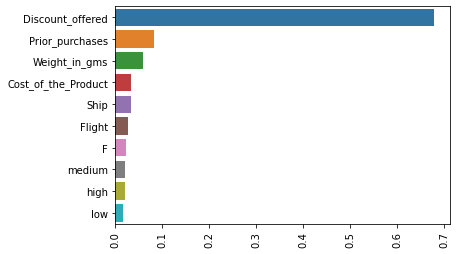

The top 3 features are isActiveMember, Age, and NumofProducts. It is same as the Decision tree but different from the Random Forest as the isActiveMember is replaced by Balance. I would choose isActiveMember, Age, and NumofProducts. The XGBoost has the highest score of performance. In the XGBoost features, Balance is the No.5 important feature, and its value is way below the top 3.


In [124]:
## YOUR CODE HERE
warnings.simplefilter(action='ignore', category=UserWarning)
best_xgb = XGBClassifier(n_estimators=ns[np.argmax(xgb_scores)], max_depth = depths[np.argmax(xgb_scores)],learning_rate = learning_rates[np.argmax(xgb_scores)])
best_xgb.fit(bank_X_train,bank_y_train)
feature_impors = list(zip(bank_X_train.columns,best_xgb.feature_importances_))
feats, imps = zip(*(sorted(list(filter(lambda x:x[1]!=0,feature_impors)),key=lambda x:x[1], reverse = True)))
ax = sns.barplot(list(imps),list(feats))
ax.tick_params(axis='x',rotation=90)
plt.show()
print("The top 3 features are isActiveMember, Age, and NumofProducts. It is same as the Decision tree but different \
from the Random Forest as the isActiveMember is replaced by Balance. I would choose isActiveMember, Age, and NumofProducts. \
The XGBoost has the highest score of performance. In the XGBoost features, Balance is the No.5 important feature, \
and its value is way below the top 3.") Second is discount weight cost

**3.5: Can you choose the top 5 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [125]:
## YOUR CODE HERE
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
ns = [100,200,300,400,500,600,700,800,900,1000]
depths = [3,4,6,7,8,9,10,11,12,13]
learning_rates = [0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19]
xgb_scores = []
for i in range(10):
    xgb = XGBClassifier(n_estimators=ns[i], max_depth = depths[i],learning_rate = learning_rates[i])
    xgb.fit(bank_X_train[list(feats[:5])],bank_y_train)
    xgb_score = cross_val_score(xgb,X_train[list(feats[:5])],y_train,cv=10)
    xgb_scores.append(np.mean(xgb_score))

xgb_best_score = np.max(xgb_scores) 
print(f"The performance of xgboosting is {xgb_best_score} which is almost the same as {xgb_best_score} in Q3.2. \
The model performs as good as in Q3.2. This is because the model is most influence by the top features. The variance \
of less important features do not have large impact of the model and its performance. Thus, the performance is \
almost the same.")

[15:10:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:10:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[15:11:03] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:03] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[15:11:16] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:17] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[15:11:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:44] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:11:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

[15:12:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:12:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

## Question 4: Calibration

**4.1: Estimate the brier score for the HistGradientBoosting model (trained with optimal hyperparameters from Q3.2) scored on the test dataset.**

In [176]:
## YOUR CODE HERE
from sklearn.metrics import brier_score_loss
brier_score_loss(bay_test,model.predict(bank_X_test))

0.3231404958677686

**4.2: Calibrate the trained HistGradientBoosting model using Platt Scaling. Print the brier score after calibration and plot predicted v.s. actual on test datasets from the calibration method.**

In [ ]:
## YOUR CODE HERE
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibrationDisplay
cal_ir = CalibratedClassifierCV(best_xgb,cv="prefit",method="isotonic")
cal_ir.fit(bank_X_train, bank_y_train)
cal_ir_predict = cal_ir.predict_proba(bank_X_test)
cal_ir_true, cal_ir_prob = calibration_curve(bank_y_test, cal_ir_predict[:,1], n_bins=10)

cal_pl = CalibratedClassifierCV(best_xgb,cv="prefit",method="sigmoid")
cal_pl.fit(bank_X_train, bank_y_train)
cal_pl_predict = cal_pl.predict_proba(bank_X_test)
cal_pl_true, cal_pl_prob = calibration_curve(bank_y_test, cal_pl_predict[:,1], n_bins=10)

# CalibrationDisplay.from_estimator(cal_ir,bank_X_test,bank_y_test,n_bins=10,name="isotonic regression Calibrated XGB")
# CalibrationDisplay.from_estimator(cal_pl,bank_X_test,bank_y_test,n_bins=10,name="Platt scaling Calibrated XGB")
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Ideally Calibrated')
plt.plot(cal_ir_prob,cal_ir_true,marker = '.', label = 'isotonic regression')
plt.plot(cal_pl_prob,cal_pl_true,marker = '.', c= 'navy', label = 'Platt scaling')
plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.title("Calibration curve")
plt.show()


**4.3: Compare the brier scores from 4.1 and 4.2. Do the calibration methods help in having better predicted probabilities?**

In [ ]:
## YOUR CODE HERE
print(f"The brier score for isotnic regression is: {brier_score_loss(bank_y_test,cal_ir.predict(bank_X_test))}")
print(f"The brier score for Platt scaling regression is: {brier_score_loss(bank_y_test,cal_pl.predict(bank_X_test))}")
print("THe calibration methods are not helping in having better predicted probabilities.")